# 以 Scikit-Learn 做機器學習

[數據交點](https://www.datainpoint.com/) | 郭耀仁 <yaojenkuo@datainpoint.com>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from xgboost import XGBRegressor
from xgboost import XGBClassifier

## 關於 Scikit-Learn

## 什麼是 Scikit-Learn?

> Scikit-learn 是開源的機器學習模組，透過它可以進行監督式以及非監督式學習，它提供了模型配適、資料預處理、模型選擇以及模型評估等功能。

來源：<https://scikit-learn.org>

## 以 `import` 指令載入 `sklearn`

In [2]:
import sklearn

## 如果環境中沒有安裝 Scikit-Learn，載入時會遭遇 `ModuleNotFoundError`

```
Traceback (most recent call last):
  File "<stdin>", line 1, in <module>
ModuleNotFoundError: No module named 'sklearn'
```

## 如果遭遇 ModuleNotFoundError 可以在終端機使用 `pip install` 指令安裝

```bash
pip install scikit-learn
```

## 可以透過兩個屬性檢查版本號與安裝路徑

- `__version__` 屬性檢查版本號。
- `__file__` 屬性檢查安裝路徑。

In [3]:
print(sklearn.__version__)
print(sklearn.__file__)

0.24.2
/Users/kuoyaojen/opt/miniconda3/envs/pyds/lib/python3.8/site-packages/sklearn/__init__.py


## 我們通常使用 Scikit-Learn 特定類別或函數，因此多數的時候我們以 `from sklearn import FUNCTIONALITY` 載入指定的功能，而非 `import sklearn`

## 為什麼選擇 Scikit-Learn？

Scikit-Learn 有著簡潔、一致且設計良善的應用程式介面設計，它的文件撰寫得相當完整而豐富，使用 Scikit-Learn 最大的好處在於它一致的應用程式介面，這讓使用者只要理解基礎用法和語法，就能延伸切換到其他的演算法或模型。

## Scikit-Learn 應用程式介面設計原則

- **一致性**。
- **可檢查性**。
- 不擴增新類別。
- 可組合性。
- **合理預設參數**。

## Scikit-Learn 起步走

## 什麼是機器學習？

> A computer program is said to learn from experience E with respect to some class of tasks T and performance measure P if its performance at tasks in T, as measured by P, improves with experience E.

來源：[Tom Mitchel](http://www.cs.cmu.edu/~tom/)

## 傳統透過電腦程式解決問題的方式示意圖

![Imgur](https://i.imgur.com/3pojPXW.png?1)

來源：<https://www.coursera.org/learn/introduction-tensorflow>

## 給定規則 $w$ 以及資料 $X$，我們就可以定義出函數 $f$ 生成答案 $y$

\begin{equation}
y = f(X;w) = Xw
\end{equation}

## 以機器學習的電腦程式解決問題的方式示意圖

![Imgur](https://i.imgur.com/YunyLd7.png)

來源：<https://www.coursera.org/learn/introduction-tensorflow>

## 給定答案 $y$ 以及資料 $X$，機器學習的電腦程式在最小化損失函數 $J$ 的前提下生成規則 $w$
\begin{equation}
minimize \; J(w) \\
subject \; to \; \hat{y} = h(X; w) = Xw \\
where \; J(w) \; \text{measures the loss between} \; y \; \text{and} \; \hat{y}
\end{equation}

## 預測數值時最常見的損失函數 $J$

最小化均方誤差（Mean squared error）。

\begin{align}
\text{Minimize} \; J(w) =  \frac{1}{m} \sum_i^m (y_i - \hat{y_i})^2 \\
= \frac{1}{m} \sum_i^m (y_i - x_i w)^2
\end{align}

## 預測類別時最常見的損失函數 $J$

最小化預測錯誤個數。

\begin{align}
\text{Minimize} \; J(w) = | y_i \neq \hat{y_i}| \\
= | y_i \neq \sigma(x_iw)|
\end{align}

## 預測機率時最常見的損失函數 $J$

最小化交叉熵。

\begin{align}
\text{Minimize} \; J(w) = \frac{1}{m} \sum_i^m -y log \big( \sigma(x_iw) \big) - (1-y) log \Big( \sigma \big( 1 - \sigma(x_iw) \big) \Big)
\end{align}

## Scikit-Learn 的資料表達

- 外型 $(m, n)$ 的特徵矩陣 $X$。
- 外型 $(m,)$ 或 $(m, 1)$ 的目標陣列 $y$。

In [4]:
def plot_X_y():
    fig = plt.figure(figsize=(6, 4))
    ax = fig.add_axes([0, 0, 1, 1])
    ax.axis('off')
    ax.axis('equal')
    # Draw features matrix
    ax.vlines(range(6), ymin=0, ymax=9, lw=1)
    ax.hlines(range(10), xmin=0, xmax=5, lw=1)
    font_prop = dict(size=12, family='monospace')
    ax.text(-1, -1, "Feature Matrix ($X$)", size=14)
    ax.text(0.1, -0.3, r'n_features $\longrightarrow$', **font_prop)
    ax.text(-0.1, 0.1, r'$\longleftarrow$ m_samples', rotation=90,
            va='top', ha='right', **font_prop)
    # Draw labels vector
    ax.vlines(range(8, 10), ymin=0, ymax=9, lw=1)
    ax.hlines(range(10), xmin=8, xmax=9, lw=1)
    ax.text(7, -1, "Target Array ($y$)", size=14)
    ax.text(7.9, 0.1, r'$\longleftarrow$ m_samples', rotation=90,
            va='top', ha='right', **font_prop)
    ax.set_ylim(10, -2)
    plt.show()

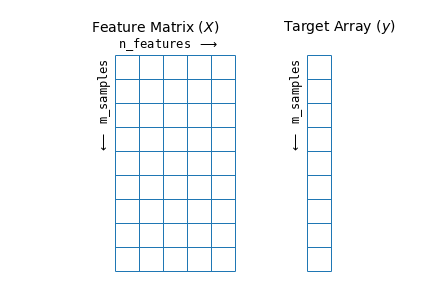

In [5]:
# 來源：<https://jakevdp.github.io/PythonDataScienceHandbook>
plot_X_y()

## 如何從資料框中取出特徵矩陣與目標陣列

In [6]:
csv_url = "https://raw.githubusercontent.com/yaojenkuo/ml-newbies/master/player_stats.csv"
player_stats = pd.read_csv(csv_url)
print(type(player_stats))
print(player_stats.shape)

<class 'pandas.core.frame.DataFrame'>
(503, 50)


In [7]:
player_stats.head()

,firstName,lastName,temporaryDisplayName,personId,teamId,jersey,isActive,pos,heightFeet,heightInches,...,ftm,fta,pFouls,points,gamesPlayed,gamesStarted,plusMinus,min,dd2,td3
0,Precious,Achiuwa,"Achiuwa, Precious",1630173,1610612748,5.0,True,F,6,8,...,56.0,110.0,91.0,304.0,61.0,4.0,-116.0,737.0,3.0,0.0
1,Steven,Adams,"Adams, Steven",203500,1610612740,12.0,True,C,6,11,...,936.0,1708.0,1497.0,5629.0,588.0,524.0,1638.0,15812.0,125.0,1.0
2,Bam,Adebayo,"Adebayo, Bam",1628389,1610612748,13.0,True,C-F,6,9,...,842.0,1141.0,668.0,3549.0,287.0,183.0,258.0,7840.0,91.0,5.0
3,Ty-Shon,Alexander,"Alexander, Ty-Shon",1630234,1610612756,0.0,True,G,6,3,...,1.0,2.0,2.0,9.0,15.0,0.0,-8.0,47.0,0.0,0.0
4,Nickeil,Alexander-Walker,"Alexander-Walker, Nickeil",1629638,1610612740,6.0,True,G,6,6,...,73.0,103.0,145.0,775.0,93.0,14.0,-105.0,1597.0,0.0,0.0


In [8]:
X = player_stats[['apg', 'rpg']].values
y = player_stats['pos'].values
print(X.shape)
print(y.shape)

(503, 2)
(503,)


In [9]:
X = player_stats['heightMeters'].values.reshape(-1, 1)
y = player_stats['weightKilograms'].values
print(X.shape)
print(y.shape)

(503, 1)
(503,)


## Scikit-Learn 估計器

## 估計器（Estimators）是 Scikit-Learn 創造的重要類別

## 兩種估計器

1. 轉換器（Transformers）：用來預處理資料。
2. 預測器（Predictors）：用來訓練資料、生成規則 $w$。

## 複習：Scikit-Learn 應用程式介面設計原則

- **一致性**。
- **可檢查性**。
- 不擴增新類別。
- 可組合性。
- **合理預設參數**。

## 合理預設參數原則

每個估計器都可以用預設參數初始化為物件（使類別實例化）。

In [10]:
# Two transformers
poly = PolynomialFeatures()
ss = StandardScaler()

In [11]:
# Two predictors
lr = LinearRegression()
ridge = Ridge()

## 一致性原則

- 每個轉換器類別都有 `fit_transform()` 方法。
- 每個預測器類別都有 `fit()` 與 `predict()` 方法。

In [12]:
# Two transformers
X_poly = poly.fit_transform(X)
X_ss = ss.fit_transform(X)

In [13]:
# Two predictors
lr.fit(X, y)
ridge.fit(X, y)

Ridge()

## 可檢查性原則

每個估計器類別都有屬性或方法讓使用者檢視轉換與預測的規則。

In [14]:
# Two transformers
print(poly.get_params())
print(ss.mean_)
print(ss.scale_)

{'degree': 2, 'include_bias': True, 'interaction_only': False, 'order': 'C'}
[1.9887674]
[0.08491413]


In [15]:
# Two predictors
print(lr.intercept_)
print(lr.coef_)
print(ridge.alpha)

-103.98696452290916
[101.73033754]
1.0


## 呼叫 Scikit-Learn 估計器的標準步驟

1. 準備特徵矩陣 $X$ 與目標陣列 $y$。
2. 切割訓練與驗證資料集。
3. 初始化估計器。
4. 訓練、配適並檢查規則。
5. 在驗證資料集評估。

## 預測數值：NBA 球員的體重

## 準備特徵矩陣 $X$ 與目標陣列 $y$

In [16]:
X = player_stats[['heightMeters', 'apg', 'rpg']].values
y = player_stats['weightKilograms'].values
print(X.shape)
print(y.shape)

(503, 3)
(503,)


## 切割訓練與驗證資料集

In [17]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(402, 3)
(101, 3)
(402,)
(101,)


## 初始化估計器

In [18]:
lr = LinearRegression()
ridge = Ridge()

## 訓練、配適並檢查規則

In [19]:
lr.fit(X_train, y_train)
ridge.fit(X_train, y_train)
print(lr.coef_)
print(ridge.coef_)

[70.55073073 -1.03712458  1.61454939]
[41.71730648 -1.79495279  2.2969704 ]


## 在驗證資料集評估

In [20]:
y_pred = lr.predict(X_valid)
print(mean_squared_error(y_valid, y_pred))
y_pred = ridge.predict(X_valid)
print(mean_squared_error(y_valid, y_pred))

53.63580742285261
60.2499055659857


## 預測類別：NBA 球員的鋒衛位置

## 準備特徵矩陣 $X$ 與目標陣列 $y$

In [21]:
pos_dict = {
    'G': 0,
    'F': 1,
    'C': 2
}
pos_recoded = player_stats['pos'].map(lambda x: x[0])
pos_recoded_int = pos_recoded.map(pos_dict)
X = player_stats[['heightMeters', 'apg', 'rpg']].values
y = pos_recoded_int.values
print(X.shape)
print(y.shape)

(503, 3)
(503,)


## 切割訓練與驗證資料集

In [22]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(402, 3)
(101, 3)
(402,)
(101,)


## 初始化估計器

In [23]:
logreg = LogisticRegression()
svc = SVC(kernel='linear', probability=True)

## 訓練、配適並檢查規則

In [24]:
logreg.fit(X_train, y_train)
svc.fit(X_train, y_train)
print(logreg.coef_)
print(svc.coef_)

[[-2.79855675  1.44081639 -1.11626655]
 [ 0.77311683 -0.181357    0.29423135]
 [ 2.02543992 -1.2594594   0.8220352 ]]
[[-3.56870681  1.17220423 -1.02617682]
 [-2.28        1.07865176 -0.67415719]
 [-2.06        0.55268973 -0.26909661]]


In [25]:
print(logreg.predict_proba(X_valid)[:5, :])
print(svc.predict_proba(X_valid)[:5, :])

[[3.28277259e-01 6.11285172e-01 6.04375685e-02]
 [1.58983789e-01 7.83373574e-01 5.76426368e-02]
 [9.63152975e-01 3.65027894e-02 3.44235186e-04]
 [1.11232339e-01 7.84153939e-01 1.04613722e-01]
 [1.79113159e-01 7.25169360e-01 9.57174807e-02]]
[[0.31696488 0.6271961  0.05583902]
 [0.15383088 0.80514514 0.04102397]
 [0.96151743 0.03724796 0.0012346 ]
 [0.10025218 0.8056887  0.09405912]
 [0.17110019 0.75285219 0.07604762]]


## 在驗證資料集評估

In [26]:
y_pred = logreg.predict(X_valid)
print(accuracy_score(y_valid, y_pred))
y_pred = svc.predict(X_valid)
print(accuracy_score(y_valid, y_pred))

0.7524752475247525
0.7623762376237624


## 延伸到其他機器學習框架

## 什麼是機器學習框架？

機器學習框架是讓開發者能更快、更簡單地建立與部署機器學習模型的應用程式介面，受歡迎的機器學習框架包括 Scikit-Learn、TensorFlow 與 PyTorch...等。

## 如果沒有機器學習框架呢？

我們必須自行定義評估器類別。

## 以正規方程類別 `NormalEquation` 為例

```python
class NormalEquation:
    """
    This class defines the Normal equation for linear regression.
    Args:
        fit_intercept (bool): Whether to add intercept for this model.
    """
    def __init__(self, fit_intercept=True):
        self._fit_intercept = fit_intercept
```

```python
    def fit(self, X_train, y_train):
        """
        This function uses Normal equation to solve for weights of this model.
        Args:
            X_train (ndarray): 2d-array for feature matrix of training data.
            y_train (ndarray): 1d-array for target vector of training data.
        """
        self._X_train = X_train.copy()
        self._y_train = y_train.copy()
        m = self._X_train.shape[0]
        if self._fit_intercept:
            X0 = np.ones((m, 1), dtype=float)
            self._X_train = np.concatenate([X0, self._X_train], axis=1)
        X_train_T = np.transpose(self._X_train)
        left_matrix = np.dot(X_train_T, self._X_train)
        right_matrix = np.dot(X_train_T, self._y_train)
        left_matrix_inv = np.linalg.inv(left_matrix)
        w = np.dot(left_matrix_inv, right_matrix)
        w_ravel = w.ravel().copy()
        self._w = w
        self.intercept_ = w_ravel[0]
        self.coef_ = w_ravel[1:]
```

```python
    def predict(self, X_test):
        """
        This function returns predicted values with weights of this model.
        Args:
            X_test (ndarray): 2d-array for feature matrix of test data.
        """
        self._X_test = X_test.copy()
        m = self._X_test.shape[0]
        if self._fit_intercept:
            X0 = np.ones((m, 1), dtype=float)
            self._X_test = np.concatenate([X0, self._X_test], axis=1)
        y_pred = np.dot(self._X_test, self._w)
        return y_pred
```

In [27]:
class NormalEquation:
    """
    This class defines the Normal equation for linear regression.
    Args:
        fit_intercept (bool): Whether to add intercept for this model.
    """
    def __init__(self, fit_intercept=True):
        self._fit_intercept = fit_intercept
    def fit(self, X_train, y_train):
        """
        This function uses Normal equation to solve for weights of this model.
        Args:
            X_train (ndarray): 2d-array for feature matrix of training data.
            y_train (ndarray): 1d-array for target vector of training data.
        """
        self._X_train = X_train.copy()
        self._y_train = y_train.copy()
        m = self._X_train.shape[0]
        if self._fit_intercept:
            X0 = np.ones((m, 1), dtype=float)
            self._X_train = np.concatenate([X0, self._X_train], axis=1)
        X_train_T = np.transpose(self._X_train)
        left_matrix = np.dot(X_train_T, self._X_train)
        right_matrix = np.dot(X_train_T, self._y_train)
        left_matrix_inv = np.linalg.inv(left_matrix)
        w = np.dot(left_matrix_inv, right_matrix)
        w_ravel = w.ravel().copy()
        self._w = w
        self.intercept_ = w_ravel[0]
        self.coef_ = w_ravel[1:]
    def predict(self, X_test):
        """
        This function returns predicted values with weights of this model.
        Args:
            X_test (ndarray): 2d-array for feature matrix of test data.
        """
        self._X_test = X_test.copy()
        m = self._X_test.shape[0]
        if self._fit_intercept:
            X0 = np.ones((m, 1), dtype=float)
            self._X_test = np.concatenate([X0, self._X_test], axis=1)
        y_pred = np.dot(self._X_test, self._w)
        return y_pred

In [28]:
X = player_stats[['heightMeters', 'apg', 'rpg']].values
y = player_stats['weightKilograms'].values
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
ne = NormalEquation()
ne.fit(X_train, y_train)
print(ne.intercept_)
print(ne.coef_)

-46.166884521983775
[70.55073073 -1.03712458  1.61454939]


## 因為機器學習框架的存在，讓我們得以在不需要自行定義評估器類別的情況下建立與部署機器學習模型

## 機器學習框架分為兩類

1. 泛用的機器學習框架：Scikit-Learn、h2O、XGBoost、MLlib...等。
2. 專用的神經網路框架：TensorFlow, PyTorch...等。

## 我們可以將 Scikit-Learn 的所學延伸到其他機器學習框架

## 什麼是 XGBoost？

> XGBoost 是一個開源軟體，為 C++、Java、Python、R、和 Julia 提供了一個梯度提升機器學習演算法，由於這個演算法受到許多在機器學習競賽中獲獎團隊的青睞，因而受到了廣泛的歡迎和關注。

來源：<https://en.wikipedia.org/wiki/XGBoost>

## 以 XGBoost 預測數值：NBA 球員的體重

1. 準備特徵矩陣 $X$ 與目標陣列 $y$。
2. 切割訓練與驗證資料集。
3. 初始化估計器。
4. 訓練、配適並檢查規則。
5. 在驗證資料集評估。

## 準備特徵矩陣 $X$ 與目標陣列 $y$

In [29]:
X = player_stats[['heightMeters', 'apg', 'rpg']].values
y = player_stats['weightKilograms'].values

## 切割訓練與驗證資料集

In [30]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(402, 3)
(101, 3)
(402,)
(101,)


## 初始化估計器

In [31]:
xgb_r = XGBRegressor()

## 訓練、配適並檢查規則

In [32]:
xgb_r.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

## 在驗證資料集評估

In [33]:
y_pred = xgb_r.predict(X_valid)
print(mean_squared_error(y_valid, y_pred))

71.92242945541291


## 以 XGBoost 預測類別：NBA 球員的鋒衛位置

1. 準備特徵矩陣 $X$ 與目標陣列 $y$。
2. 切割訓練與驗證資料集。
3. 初始化估計器。
4. 訓練、配適並檢查規則。
5. 在驗證資料集評估。

## 準備特徵矩陣 $X$ 與目標陣列 $y$

In [34]:
X = player_stats[['heightMeters', 'apg', 'rpg']].values
y = pos_recoded_int.values
print(X.shape)
print(y.shape)

(503, 3)
(503,)


## 切割訓練與驗證資料集

In [35]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(402, 3)
(101, 3)
(402,)
(101,)


## 初始化估計器

In [36]:
xgb_c = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

## 訓練、配適並檢查規則

In [37]:
xgb_c.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

## 在驗證資料集評估

In [38]:
y_pred = xgb_c.predict(X_valid)
print(accuracy_score(y_valid, y_pred))

0.8811881188118812
